In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [21]:
uber_data = pd.read_csv('./Data Set/Uber Drives.csv')

In [22]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
uber_data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [24]:
uber_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [25]:
new_uber_data = uber_data.fillna({
    'CATEGORY*' : 'Do Not Mention',
    'PURPOSE*' : 'Do Not Mention'
})

In [26]:
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Do Not Mention
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [27]:
new_uber_data.dropna(inplace = True)

In [28]:
new_uber_data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [29]:
new_uber_data['START_DATE*'] = pd.to_datetime(new_uber_data['START_DATE*'], format='%m/%d/%Y %H:%M')
new_uber_data['END_DATE*'] = pd.to_datetime(new_uber_data['END_DATE*'], format='%m/%d/%Y %H:%M')

In [30]:
new_uber_data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [31]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for i in new_uber_data['START_DATE*']:
    hour.append(i.hour)
    day.append(i.day)
    dayofweek.append(i.dayofweek)
    month.append(i.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
new_uber_data['HOUR'] = hour
new_uber_data['DAY'] = day
new_uber_data['DAY OF WEEK'] = dayofweek
new_uber_data['MONTH'] = month
new_uber_data['WEEKDAY'] = weekday

In [32]:
new_uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Do Not Mention,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [33]:
new_uber_data['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

# Count by Category Chart

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

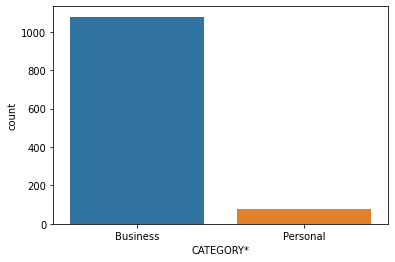

In [34]:
sns.countplot(x = 'CATEGORY*', data = new_uber_data)

# Number of Miles Travel by Uber

<AxesSubplot:ylabel='Frequency'>

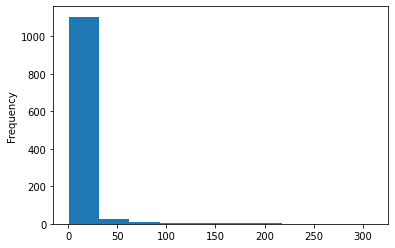

In [35]:
new_uber_data['MILES*'].plot.hist()

# Number of Trips by Hours

Text(0.5, 1.0, 'Number of Trips by Hours')

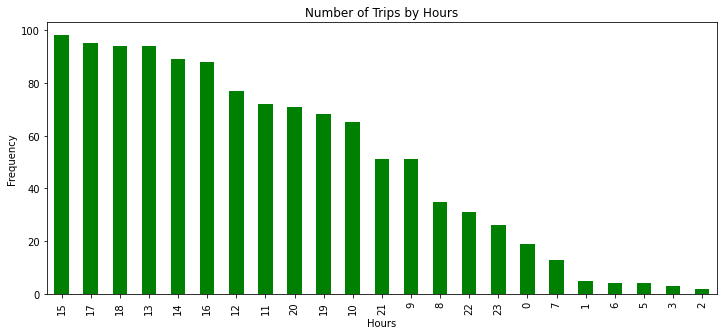

In [36]:
hours = new_uber_data['HOUR'].value_counts()
#can also write as
#hours = new_uber_data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar', color = 'green', figsize = (12, 5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips by Hours')

# Number of Trips by Purpose

Text(0.5, 1.0, 'Number of Trips by Purpose')

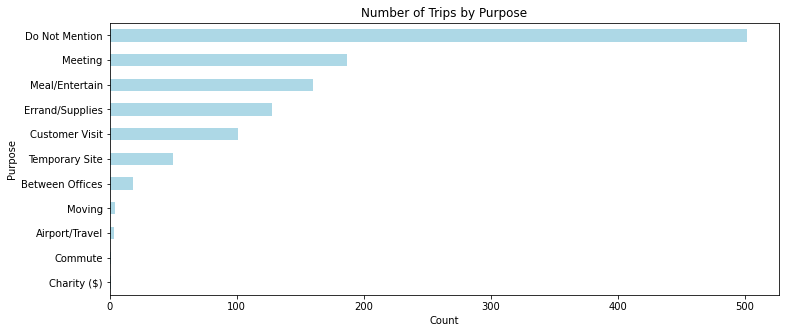

In [125]:
new_uber_data['PURPOSE*'].value_counts().sort_values().plot(kind = 'barh', color = "lightblue", figsize = (12, 5))
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Number of Trips by Purpose')

# Number of Trips by Days

Text(0.5, 1.0, 'Number of Trips by Days')

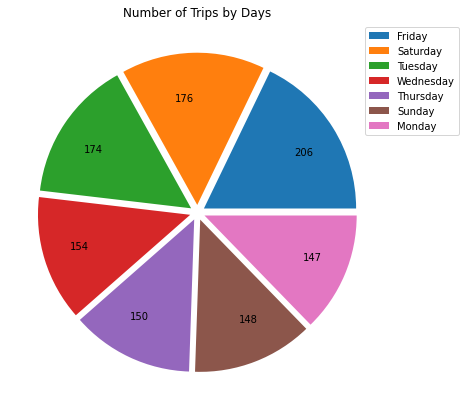

In [53]:
weekdays = new_uber_data['WEEKDAY'].value_counts()
days = new_uber_data['WEEKDAY'].unique()
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize = (7, 7))
plt.pie(weekdays,  labels = weekdays, labeldistance = 0.7, explode = explode)
plt.legend(days, bbox_to_anchor = (1.2, 1))
plt.title('Number of Trips by Days')

# Number of Trip by Date

Text(0.5, 1.0, 'Number of Trip by Date')

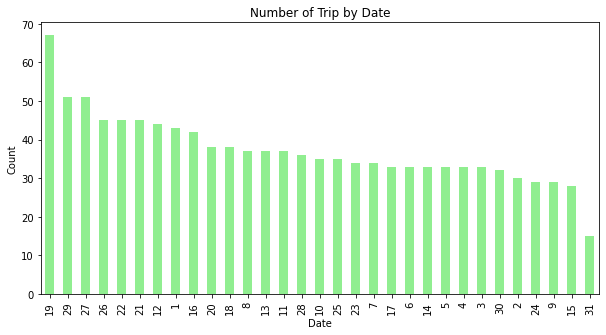

In [127]:
new_uber_data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Trip by Date')

# Number of Trip per Month

Text(0.5, 1.0, 'Number of Trip per Month')

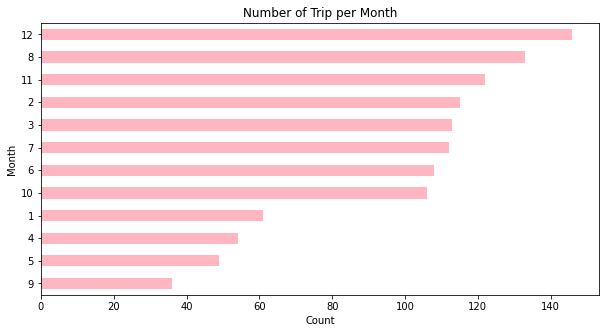

In [122]:
new_uber_data['MONTH'].value_counts().sort_values().plot(kind='barh',figsize=(10,5),color='lightpink')
plt.xlabel('Count')
plt.ylabel('Month')
plt.title('Number of Trip per Month')

# Top 10 Starting point of Trip

Text(0.5, 1.0, 'Top 10 Starting point of Trip')

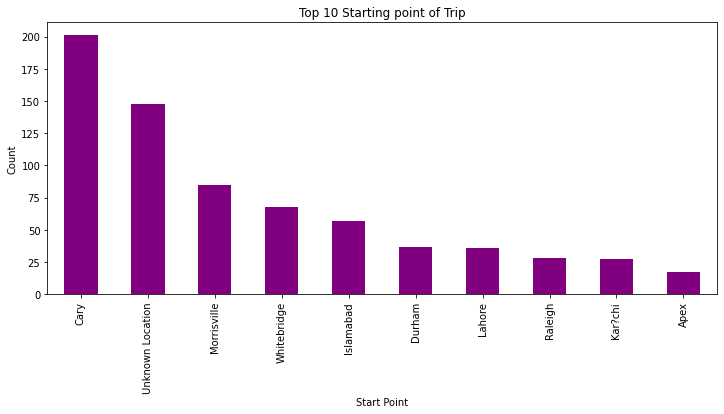

In [130]:
new_uber_data['START*'].value_counts().head(10).plot(kind='bar',figsize=(12,5),color='purple')
plt.xlabel('Start Point')
plt.ylabel('Count')
plt.title('Top 10 Starting point of Trip')